In [1]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('ADDYY.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())


                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2018-12-31  104.599998  105.050003  104.190002  104.339996   99.485031  120000
2019-01-02  105.419998  105.559998  104.449997  104.889999  100.009445   33000
2019-01-03  105.809998  105.889999  104.510002  104.529999   99.666191   82000
2019-01-04  107.550003  109.190002  107.550003  108.779999  103.718445   69700
2019-01-07  108.610001  109.180000  108.419998  109.099998  104.023552   82900


In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# 2.  chia train test theo tỉ lệ 7-3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]


In [4]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4430.362, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4436.710, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4435.516, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4435.778, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4434.741, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4436.359, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4436.984, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4432.330, Time=1.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4432.333, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4436.927, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4437.078, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4438.076, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4434.353, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4428.392, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88.14183273 88.30928137 88.45266298 88.23485566 88.30794281 88.39339564
 88.28089651 88.31126146 88.3610274  88.30341666 88.31507434 88.34352606
 88.314285   88.31813304 88.33415103 88.31944829 88.3202735  88.32917328
 88.32185509 88.32166509 88.32655278 88.32295054 88.32252848 88.32518476
 88.32343369 88.32304683 88.32447655 88.32363754 88.32335044 88.32411302]


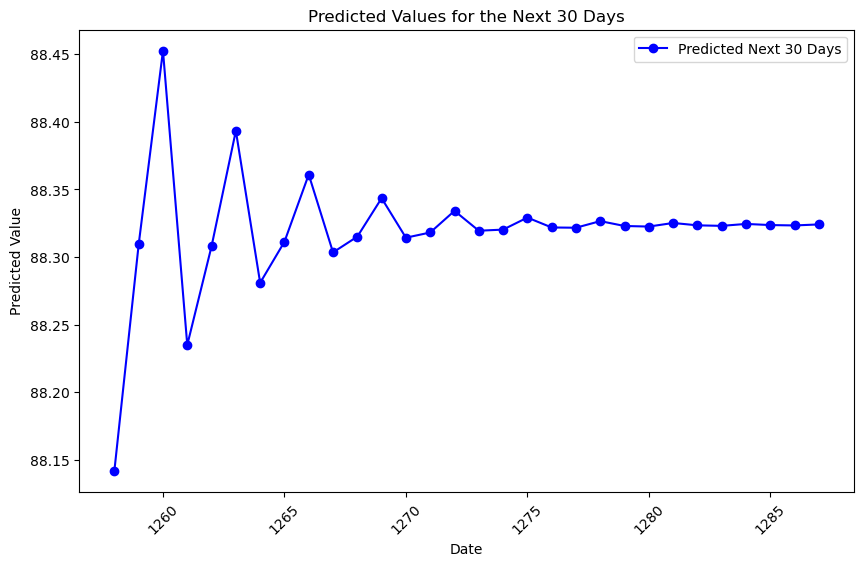

In [7]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [8]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 14.826573816336012
Testing MAPE: 0.15910078720528437
Testing MAE: 11.269573676951289
Testing MSE: 219.82729113126064


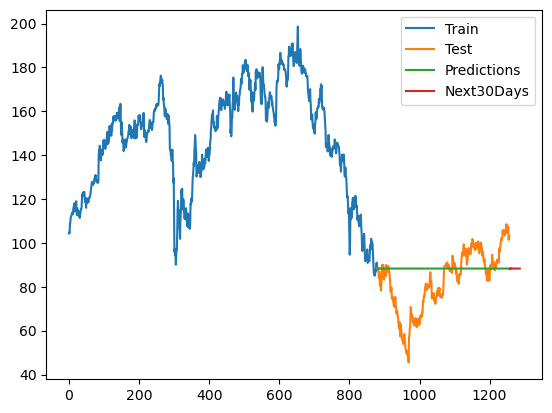

In [9]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

In [10]:
#train-test (8-2)

In [11]:
# 2.  chia train test theo tỉ lệ 8-2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]

In [12]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5010.272, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5019.124, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5017.987, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5018.216, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5017.284, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5019.069, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5019.657, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5012.098, Time=0.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5012.114, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5019.437, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5019.580, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5020.744, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5014.272, Time=0.88 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5008.415, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [14]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[67.37310552 67.72955331 67.33353623 67.37454067 67.62121994 67.41188403
 67.39285054 67.55306368 67.44901236 67.4132789  67.51215747 67.46470065
 67.43037061 67.48867629 67.46995715 67.44292769 67.47580572 67.47061026
 67.45144251 67.46911254 67.46956314 67.4568863  67.46585681 67.46814404
 67.46020065 67.46442074 67.46688004 67.46212993 67.46389081 67.46592013]


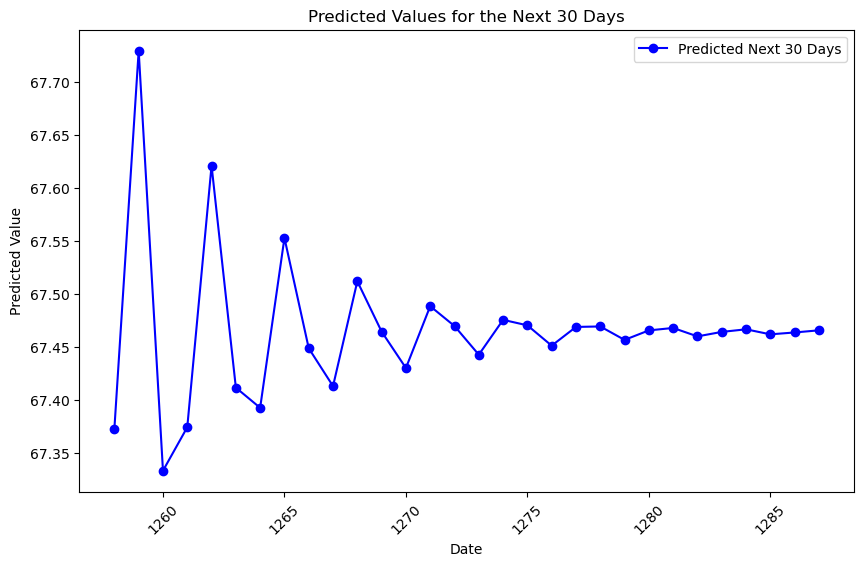

In [15]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [16]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 23.897421151389572
Testing MAPE: 0.2378993800286846
Testing MAE: 22.04116724009532
Testing MSE: 571.0867376868817


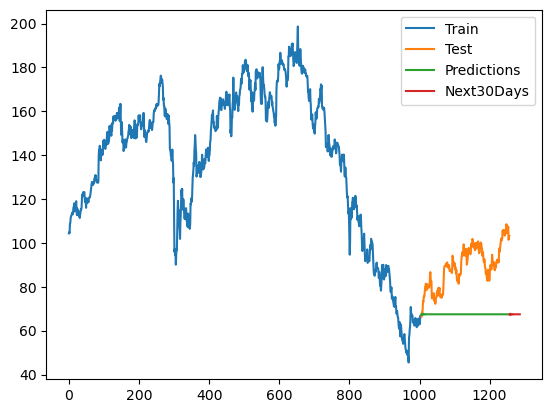

In [17]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

In [18]:
#train-test (9-1)

In [26]:
# 2.  chia train test theo tỉ lệ 9-1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]

In [27]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5564.570, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5572.205, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5570.434, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5570.662, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5570.216, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5572.498, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5568.872, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5566.570, Time=1.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5566.570, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5571.938, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5573.713, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5574.351, Time=0.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5568.494, Time=0.74 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5562.580, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [29]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[94.42705269 94.80778224 94.47117285 94.47381245 94.70679902 94.51907939
 94.50612075 94.64756498 94.54377161 94.52779118 94.61303098 94.55618783
 94.54200456 94.59301994 94.56222578 94.55116347 94.581496   94.56502285
 94.55698045 94.57490172 94.56622109 94.56063002 94.57115323 94.56666272
 94.56289569 94.56903725 94.56676847 94.56428915 94.56785169 94.56674109]


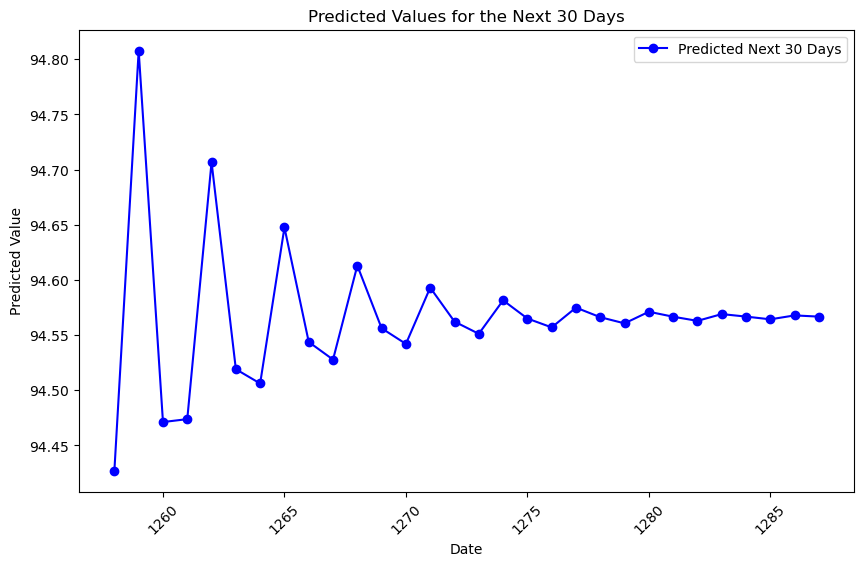

In [30]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [31]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 6.381964299188696
Testing MAPE: 0.056590108278349566
Testing MAE: 5.432332343361358
Testing MSE: 40.72946831611906


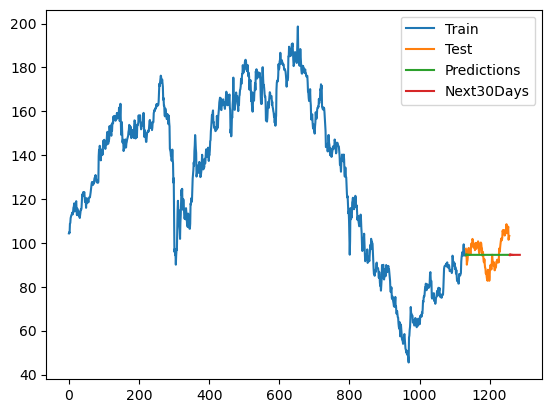

In [32]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()